In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df["Species"] = df["Species"].replace({'Iris-setosa':0, "Iris-versicolor": 1, "Iris-virginica": 2})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


#### Check for linearity

In [8]:
df.corr().tail(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Species,0.94283,0.782561,-0.419446,0.949043,0.956464,1.0


<AxesSubplot:>

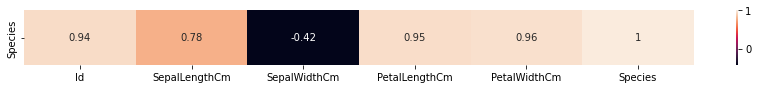

In [9]:
plt.figure(figsize=(15,1))
sns.heatmap(df.corr().tail(1), annot=True)

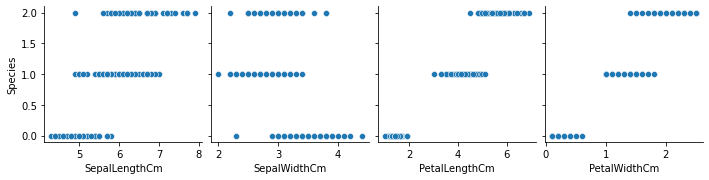

In [10]:
sns.pairplot(data=df, x_vars=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], y_vars=["Species"])

#### Check for multicolinearity

In [11]:
df.shape

(150, 6)

In [12]:
df_vif = df.drop(["Id", "Species"], axis=1)


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(df_vif.shape[1]):
    vi = variance_inflation_factor(df_vif.to_numpy(), i)
    vif.append(vif)
print(vif)

[[...], [...], [...], [...]]


<AxesSubplot:>

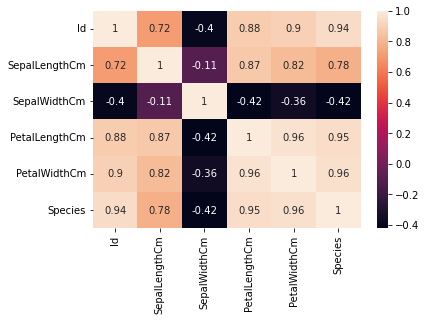

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
# residuals_1 = y_test - y_test_pred
# sns.kdeplot(residuals_1,fill=True)

In [16]:
# residuals_1 = y_train - y_train_pred
# sns.kdeplot(residuals_1,fill=True)

## Model Training

In [17]:
x = df.drop(["Id", "Species"], axis=1)
y = df["Species"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [19]:
classifier = LogisticRegression(multi_class="ovr")
classifier.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

### test and train predictions

In [20]:
y_test_pred = classifier.predict(x_test)

y_train_pred = classifier.predict(x_train)

In [21]:
y_test[:10]

107    2
9      0
98     1
11     0
43     0
0      0
148    2
111    2
121    2
76     1
Name: Species, dtype: int64

In [22]:
y_test_pred[:10]

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1], dtype=int64)

In [23]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy for Test set :- {test_accuracy}")

Accuracy for Test set :- 0.9333333333333333


In [24]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for Train| set :- {train_accuracy}")

Accuracy for Train| set :- 0.9583333333333334


#### Classification report

In [25]:
clf_rep = classification_report(y_test, y_test_pred)
print(f"Classification Report (Test set):- {clf_rep}")

Classification Report (Test set):-               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [26]:
clf_rep = classification_report(y_train, y_train_pred)
print(f"Classification Report (Training set):- {clf_rep}")

Classification Report (Training set):-               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.90      0.94        40
           2       0.91      0.97      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### Confusion matrix

In [27]:
multilabel_confusion_matrix(y_train,y_train_pred)

array([[[80,  0],
        [ 0, 40]],

       [[79,  1],
        [ 4, 36]],

       [[76,  4],
        [ 1, 39]]], dtype=int64)

In [28]:
confusion_matrix(y_train,y_train_pred)

array([[40,  0,  0],
       [ 0, 36,  4],
       [ 0,  1, 39]], dtype=int64)

### AUC ROC Curve

In [29]:
y_test_prob = classifier.predict_proba(x_test)
y_train_prob = classifier.predict_proba(x_train)

In [30]:
# y_test_prob

In [31]:
# fpr,tpr,threshold = roc_curve(y_test,y_test_prob)

In [32]:
y_test_prob[:5]

array([[3.61965026e-05, 3.41589378e-01, 6.58374426e-01],
       [7.87974999e-01, 2.12022695e-01, 2.30633454e-06],
       [3.26510816e-01, 6.71338722e-01, 2.15046192e-03],
       [8.50466721e-01, 1.49529750e-01, 3.52954463e-06],
       [9.13091357e-01, 8.69001472e-02, 8.49539420e-06]])

In [33]:
y_test_prob[0:,0:1].reshape(30)

array([3.61965026e-05, 7.87974999e-01, 3.26510816e-01, 8.50466721e-01,
       9.13091357e-01, 8.97258003e-01, 5.94589898e-04, 4.64713312e-04,
       2.03589538e-03, 3.41040014e-03, 9.63676918e-01, 2.81405526e-02,
       2.76924380e-04, 2.53203623e-02, 1.02033811e-03, 9.84935673e-01,
       9.16214104e-05, 5.00623019e-02, 1.95097259e-01, 2.69511256e-03,
       2.38385820e-02, 1.64866715e-02, 7.87974999e-01, 7.34341438e-01,
       7.54212013e-04, 8.51524124e-03, 9.50779107e-01, 7.68970987e-01,
       9.66658646e-03, 6.51775105e-03])

In [34]:
y_test_prob[0:,1:2]

array([[0.34158938],
       [0.21202269],
       [0.67133872],
       [0.14952975],
       [0.08690015],
       [0.10273986],
       [0.1564239 ],
       [0.37411877],
       [0.41034461],
       [0.58483729],
       [0.03632077],
       [0.91727718],
       [0.24646852],
       [0.94298979],
       [0.44921434],
       [0.01506084],
       [0.25683079],
       [0.8697466 ],
       [0.80116929],
       [0.39401915],
       [0.80568186],
       [0.70241355],
       [0.21202269],
       [0.26565653],
       [0.27645809],
       [0.72365605],
       [0.04921396],
       [0.23102726],
       [0.43808605],
       [0.63202813]])

In [35]:
# y_test_prob[0:,2:3]
y_test_prob[0:,2:3].reshape(30)

array([6.58374426e-01, 2.30633454e-06, 2.15046192e-03, 3.52954463e-06,
       8.49539420e-06, 2.13294200e-06, 8.42981515e-01, 6.25416515e-01,
       5.87619496e-01, 4.11752310e-01, 2.31387402e-06, 5.45822644e-02,
       7.53254558e-01, 3.16898459e-02, 5.49765318e-01, 3.49136696e-06,
       7.43077593e-01, 8.01911006e-02, 3.73345141e-03, 6.03285739e-01,
       1.70479561e-01, 2.81099780e-01, 2.30633454e-06, 2.03611468e-06,
       7.22787697e-01, 2.67828708e-01, 6.92902133e-06, 1.75364147e-06,
       5.52247366e-01, 3.61454118e-01])

In [36]:
y_test.shape

(30,)

### AUC curve

In [37]:
prob1 = y_test_prob[0:,0]
prob2 = y_test_prob[0:,1]
prob3 = y_test_prob[0:,2]
print(prob1.shape)
#        [3.61965026e-05, 3.41589378e-01, 6.58374426e-01] >> 2
#        [7.87974999e-01, 2.12022695e-01, 2.30633454e-06] >> 0
#        [3.26510816e-01, 6.71338722e-01, 2.15046192e-03] >> 1
#        [8.50466721e-01, 1.49529750e-01, 3.52954463e-06] >> 0
#        [9.13091357e-01, 8.69001472e-02, 8.49539420e-06] >> 0

(30,)


In [38]:
fpr1,tpr1,threshold1 = roc_curve(y_test, prob1, pos_label=0)
fpr2,tpr2,threshold2 = roc_curve(y_test, prob2, pos_label=1)
fpr3,tpr3,threshold3 = roc_curve(y_test, prob3, pos_label=2)

In [39]:
print(tpr1, len(tpr1))
print(tpr2, len(tpr2))
print(tpr3, len(tpr3))

[0.  0.1 0.6 0.8 1.  1. ] 6
[0.  0.1 0.5 0.5 0.9 0.9 1.  1.  1.  1. ] 10
[0.  0.1 0.8 0.8 0.9 0.9 1.  1.  1.  1. ] 10


In [40]:
print(fpr1, len(fpr1))
print(fpr2, len(fpr2))
print(fpr3, len(fpr3))

[0. 0. 0. 0. 0. 1.] 6
[0.   0.   0.   0.05 0.05 0.1  0.1  0.55 0.65 1.  ] 10
[0.   0.   0.   0.05 0.05 0.2  0.2  0.75 0.85 1.  ] 10


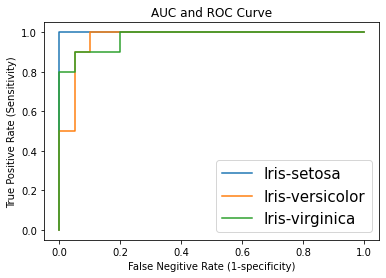

In [41]:
plt.figure(facecolor="white")
plt.title("AUC and ROC Curve")
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.plot(fpr3,tpr3)
plt.xlabel("False Negitive Rate (1-specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], loc="lower right",markerscale=3, fontsize=15)
plt.show()

In [42]:
# !pip install yellowbrick

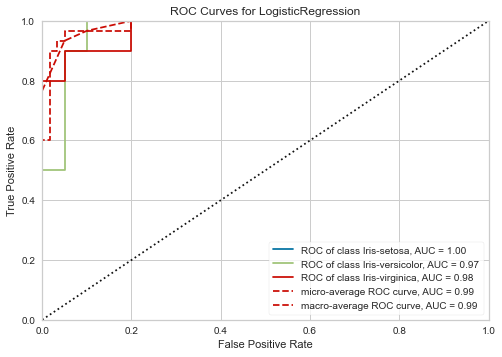

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
from yellowbrick.classifier import ROCAUC
# from yellowbrick.datasets import load_game

visualizer = ROCAUC(classifier, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [44]:
roc_auc_score(y_test, y_test_prob, multi_class="ovr")

0.9816666666666668

In [45]:
roc_auc_score(y_train, y_train_prob, multi_class="ovr")

0.9926041666666666

In [46]:
import sklearn
sklearn.__version__

'1.0.2'

In [47]:
y_train.shape
df.Species.unique()

array([0, 1, 2], dtype=int64)

###  for train set

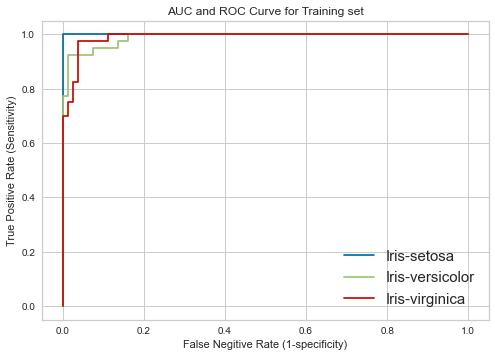

In [48]:
n_class_train = 3
fpr2 = dict()
tpr2 = dict()
threshold2 = dict()

# graph = 0

for i in range(n_class_train):
    fpr2[i], tpr2[i], threshold2[i] = roc_curve(y_train, y_train_prob[:,i], pos_label=i)
    graph = plt.plot(fpr2[i], tpr2[i])

graph 
plt.title("AUC and ROC Curve for Training set")
plt.xlabel("False Negitive Rate (1-specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], loc="lower right",markerscale=3, fontsize=15)
plt.show()

In [49]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
107,7.3,2.9,6.3,1.8
9,4.9,3.1,1.5,0.1
98,5.1,2.5,3.0,1.1
11,4.8,3.4,1.6,0.2
43,5.0,3.5,1.6,0.6


In [50]:
classifier.predict(x_test.head())

array([2, 0, 1, 0, 0], dtype=int64)

In [56]:
x_test.iloc[2:3]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
98,5.1,2.5,3.0,1.1


In [57]:
predict = classifier.predict(x_test.iloc[2:3])
predict[0]

1

In [58]:
def predictions(SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm):
    predict = classifier.predict([[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]])
    print(f"Predictios are:- {predict[0]}")
    return predict[0]

In [59]:
predictions(2,3,4,5)

Predictios are:- 2


2

In [60]:
import pickle
import os
model_folder_path = "model"
if not os.path.exists(model_folder_path):
    os.mkdir(model_folder_path)
pickle.dump(classifier, open(f"{model_folder_path}/model.pkl", "wb"))